In [1]:
import requests

In [5]:
start_cycle = 150
missed_priorities_per_cycle = {'cycle':range(start_cycle,230), 'missed_priorities':[]}
for cycle in missed_priorities_per_cycle['cycle']:
    resp = requests.get('https://api.tzstats.com/explorer/cycle/%s' % cycle)
    missed_priorities_per_cycle['missed_priorities'].append(resp.json()['missed_priorities'])
    
print(missed_priorities_per_cycle)


{'cycle': range(150, 230), 'missed_priorities': [40, 49, 59, 40, 38, 64, 65, 40, 52, 71, 282, 155, 170, 129, 114, 121, 133, 107, 83, 413, 257, 203, 197, 111, 55, 54, 83, 42, 39, 80, 141, 78, 84, 65, 36, 51, 90, 80, 67, 69, 21, 24, 69, 41, 37, 28, 20, 37, 43, 64, 52, 79, 33, 96, 134, 97, 100, 142, 284, 214, 175, 142, 120, 81, 100, 98, 84, 53, 60, 76, 56, 14, 15, 19, 13, 13, 8, 34, 27, 30]}


In [6]:
from pandas import DataFrame
df = DataFrame(missed_priorities_per_cycle,columns=['cycle','missed_priorities'])
print(df)

    cycle  missed_priorities
0     150                 40
1     151                 49
2     152                 59
3     153                 40
4     154                 38
..    ...                ...
75    225                 13
76    226                  8
77    227                 34
78    228                 27
79    229                 30

[80 rows x 2 columns]


Text(0.5, 1.0, 'Missed priorities per cycle')

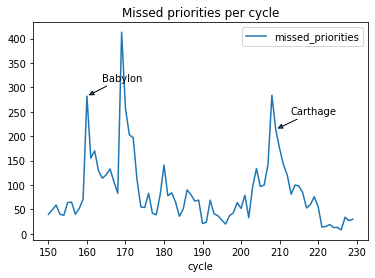

In [21]:
af = df.plot(x ='cycle', y='missed_priorities', kind = 'line')

notable_cycles = { 159 : "Babylon", 208: "Carthage" }

for notable_cycle_num, notable_cycle_name in notable_cycles.items():
    annotation_index = notable_cycle_num - start_cycle + 1
    af.annotate(notable_cycle_name,
                 (df["cycle"][annotation_index], df['missed_priorities'][annotation_index]),
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))

af.set_title("Missed priorities per cycle")
